<a href="https://colab.research.google.com/github/convin305/sum_petitions/blob/master/%5B%EA%B3%B5%EB%AA%A8%EC%A0%84%5D%EC%A0%84%EC%A3%BC%EC%8B%9C%20%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0/%EC%A0%84%EC%A3%BC%EC%8B%9C_%EC%9D%B8%EA%B5%AC%ED%98%84%ED%99%A9_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from google.colab import output

import warnings
warnings.filterwarnings(action='ignore') 

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

plt.rc('font', family='NanumBarunGothic')

output.clear()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
j_pop = pd.read_excel('/content/drive/MyDrive/Jeonju/data/시·군·구별_연령_각세_별_한국인_현황.xlsx',sheet_name='total',thousands=",")
j_pop

,year,합계,0~9세,10~19세,20~29세,30~39세,40~49세,50~59세,60~69세,70~79세,80~89세,90~99세,100세 이상
0,2001,622283,93387,99105,110944,107931,94369,55716,36499,17765,5845,683,39
1,2002,624485,90925,97993,108837,107919,97761,56041,39593,18388,6271,724,33
2,2003,618819,86393,96234,103686,108480,99758,57502,40192,19103,6678,757,36
3,2004,622472,83770,97880,100143,108940,101890,60730,40645,20751,6865,835,23
4,2005,621749,79994,98721,96885,107205,102815,65061,40827,22431,6923,864,23
5,2006,624849,77007,100375,94100,106323,104910,68051,42051,23784,7251,968,29
6,2007,623926,73305,100884,91134,104461,105915,70338,44110,24925,7829,999,26
7,2008,631532,71165,102825,90604,102843,109115,73350,45700,26394,8465,1046,25
8,2009,641525,65353,103668,87743,101287,110164,83209,50017,29110,9596,1277,101
9,2010,641525,65353,103668,87743,101287,110164,83209,50017,29110,9596,1277,101


In [ ]:
j_pop.dtypes

year       int64
합계         int64
0~9세       int64
10~19세     int64
20~29세     int64
30~39세     int64
40~49세     int64
50~59세     int64
60~69세     int64
70~79세     int64
80~89세     int64
90~99세     int64
100세 이상    int64
dtype: object

* 전주시 총 인구 변화 (2001~2019)

In [ ]:
j_pop["합계"]

0     622283
1     624485
2     618819
3     622472
4     621749
5     624849
6     623926
7     631532
8     641525
9     641525
10    645894
11    648863
12    650082
13    652877
14    652282
15    651744
16    648964
17    651091
18    654394
Name: 합계, dtype: int64

생각과는 다르게 전주시의 총 인구는 꾸준히 늘어나고 있었다

* 나이에 따른 인구 구성비율

In [ ]:
def piechart(what,want):
  year = what[what['year'] == want]
  ratio = []
  labels = ['0~9세','10~19세','20~29세','30~39세','40~49세','50~59세','60~69세','70~79세','80~89세','90~99세','100세 이상']
  tot = year['합계']
  for i in labels:
    rate = year[i]/tot
    ratio.append(rate)
  plt.pie(ratio, labels=labels, autopct='%.1f%%')
  plt.show()

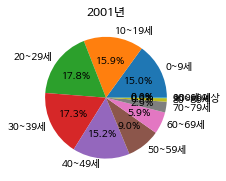

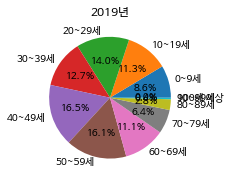

In [ ]:
plt.subplot(1,2,1)
plt.title("2001년")
piechart(j_pop,2001)

plt.subplot(1,2,2)
plt.title("2019년")
piechart(j_pop,2019)
plt.show()



19세 이하의 비율이 2001년 30%에서 2019년 20퍼센트로 감소.  
60세 이상의 비율도 크게 늘어난 것을 볼 수 있음.

In [ ]:
k_pop = pd.read_excel('/content/drive/MyDrive/Jeonju/data/시·군·구별_연령_각세_별_한국인_현황.xlsx',sheet_name='전국',thousands=",")
k_pop.head()

,year,합계,0~9세,10~19세,20~29세,30~39세,40~49세,50~59세,60~69세,70~79세,80~89세,90~99세,100세 이상
0,2008,49540367,5096863,6824922,7225638,8470294,8671848,6140573,3964796,2333042,726164,83892,2335
1,2009,49773145,4922969,6811650,7028262,8371533,8729495,6508077,4047492,2477437,783005,90626,2599
2,2010,50515666,4757524,6826875,6866956,8370549,8844352,7066823,4191329,2618525,851768,109835,11130
3,2011,50734284,4675849,6681125,6727416,8254786,8846683,7528146,4216872,2771176,901906,118691,11634
4,2012,50948272,4668711,6447279,6626948,8168943,8836158,7791570,4328536,2970343,965091,132036,12657


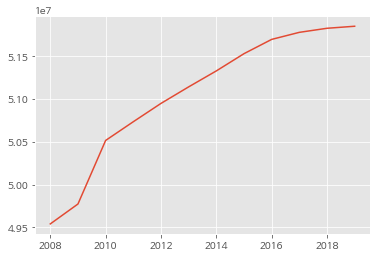

In [ ]:
plt.style.use("ggplot")
plt.plot(k_pop['year'],k_pop["합계"])
plt.show()

* 증가율 구하기 - 전국 데이터가 2008년부터 시작하므로 2008년을 기준으로 각 년도가 얼마나 증가했는지 파악

In [ ]:
criterion_k = k_pop[k_pop['year'] == 2008]['합계']
criterion_k = float(criterion_k)

criterion_j = j_pop[j_pop['year'] == 2008]['합계']
criterion_j = float(criterion_j)

In [ ]:
years = ['2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019']
korea = []
jeonju = []

for i in years : 
  korea.append(round(((k_pop[k_pop['year'] == int(i)]['합계'] / criterion_k) - 1) * 100,2))
  jeonju.append(round(((j_pop[j_pop['year'] == int(i)]['합계'] / criterion_j) - 1) * 100,2))
  

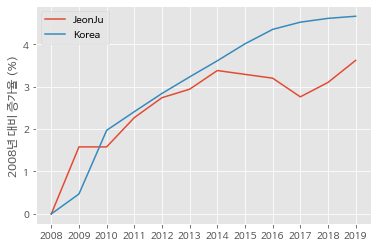

In [ ]:
plt.plot(jeonju)
plt.plot(korea)
plt.legend(['JeonJu','Korea'])
plt.ylabel("2008년 대비 증가율 (%)")
plt.xticks(np.arange(0, 12),labels=['2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019'])
plt.show()

전국의 인구증가율과 전주의 인구증가율을 비교했을 때, 
전국보다 전주의 증가율이 부진한 것을 볼 수 있다. 

* 전주와 전국의 인구 비율 비교  

In [ ]:
labels = ['year','합계','0~9세','10~19세','20~29세','30~39세','40~49세','50~59세','60~69세','70~79세','80~89세','90~99세','100세 이상'] 
j_pop2 =  pd.read_excel('/content/drive/MyDrive/Jeonju/data/시·군·구별_연령_각세_별_한국인_현황.xlsx',sheet_name='total',names=labels,thousands=",",skiprows=7)

j_pop2['child'] = j_pop2['0~9세'] + (j_pop2['10~19세']/2)
j_pop2['workingAge'] = (j_pop2['10~19세']/2) + j_pop2['20~29세'] + j_pop2['30~39세'] + j_pop2['40~49세'] + j_pop2['50~59세'] + (j_pop2['60~69세']/2)
j_pop2['old'] = (j_pop2['60~69세']/2) + j_pop2['70~79세'] + j_pop2['80~89세'] + j_pop2['90~99세'] + j_pop2['100세 이상']


j_pop2.head()

,year,합계,0~9세,10~19세,20~29세,30~39세,40~49세,50~59세,60~69세,70~79세,80~89세,90~99세,100세 이상,child,workingAge,old
0,2008,631532,71165,102825,90604,102843,109115,73350,45700,26394,8465,1046,25,122577.5,450174.5,58780.0
1,2009,641525,65353,103668,87743,101287,110164,83209,50017,29110,9596,1277,101,117187.0,459245.5,65092.5
2,2010,641525,65353,103668,87743,101287,110164,83209,50017,29110,9596,1277,101,117187.0,459245.5,65092.5
3,2011,645894,63678,101898,86717,100108,111431,88452,50920,30946,10295,1357,92,114627.0,463117.0,68150.0
4,2012,648863,62916,99151,86158,98252,112320,92124,51524,33818,11010,1483,107,112491.5,464191.5,72180.0


In [ ]:
k_pop['child'] = k_pop['0~9세'] + (k_pop['10~19세']/2)
k_pop['workingAge'] = k_pop['20~29세'] + k_pop['30~39세'] + k_pop['40~49세'] + k_pop['50~59세'] + (k_pop['10~19세']/2) + (k_pop['60~69세']/2)
k_pop['old'] = (k_pop['60~69세']/2) + k_pop['70~79세'] + k_pop['80~89세'] + k_pop['90~99세'] + k_pop['100세 이상'] 

k_pop.head()

,year,합계,0~9세,10~19세,20~29세,30~39세,40~49세,50~59세,60~69세,70~79세,80~89세,90~99세,100세 이상,child,workingAge,old
0,2008,49540367,5096863,6824922,7225638,8470294,8671848,6140573,3964796,2333042,726164,83892,2335,8509324.0,35903212.0,5127831.0
1,2009,49773145,4922969,6811650,7028262,8371533,8729495,6508077,4047492,2477437,783005,90626,2599,8328794.0,36066938.0,5377413.0
2,2010,50515666,4757524,6826875,6866956,8370549,8844352,7066823,4191329,2618525,851768,109835,11130,8170961.5,36657782.0,5686922.5
3,2011,50734284,4675849,6681125,6727416,8254786,8846683,7528146,4216872,2771176,901906,118691,11634,8016411.5,36806029.5,5911843.0
4,2012,50948272,4668711,6447279,6626948,8168943,8836158,7791570,4328536,2970343,965091,132036,12657,7892350.5,36811526.5,6244395.0


In [ ]:
def piechart2(what,want):
  year = what[what['year'] == want]
  ratio = []
  labels = ['child','workingAge','old']
  tot = year['합계']
  for i in labels:
    rate = year[i]/tot
    ratio.append(rate)
  plt.pie(ratio, labels=labels, autopct='%.1f%%')
  plt.show()

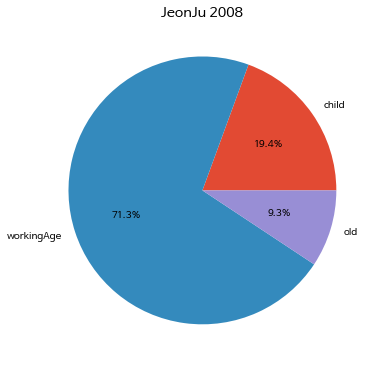

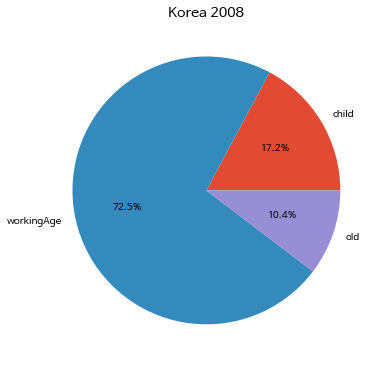

In [ ]:
plt.figure(figsize=(6,15))
plt.subplot(2,1,1)
plt.title("JeonJu 2008")
piechart2(j_pop2,2008)

plt.figure(figsize=(6,15))
plt.subplot(2,1,2)
plt.title("Korea 2008")
piechart2(k_pop,2008)

plt.show()

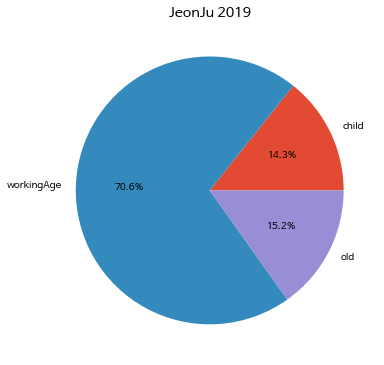

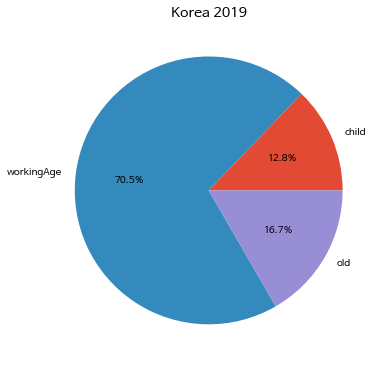

In [ ]:
plt.figure(figsize=(6,15))
plt.subplot(2,1,1)
plt.title("JeonJu 2019")
piechart2(j_pop2,2019)

plt.figure(figsize=(6,15))
plt.subplot(2,1,2)
plt.title("Korea 2019")
piechart2(k_pop,2019)

plt.show()

* 전주시의 15세이하, 65세 이상 인구 수 그래프  

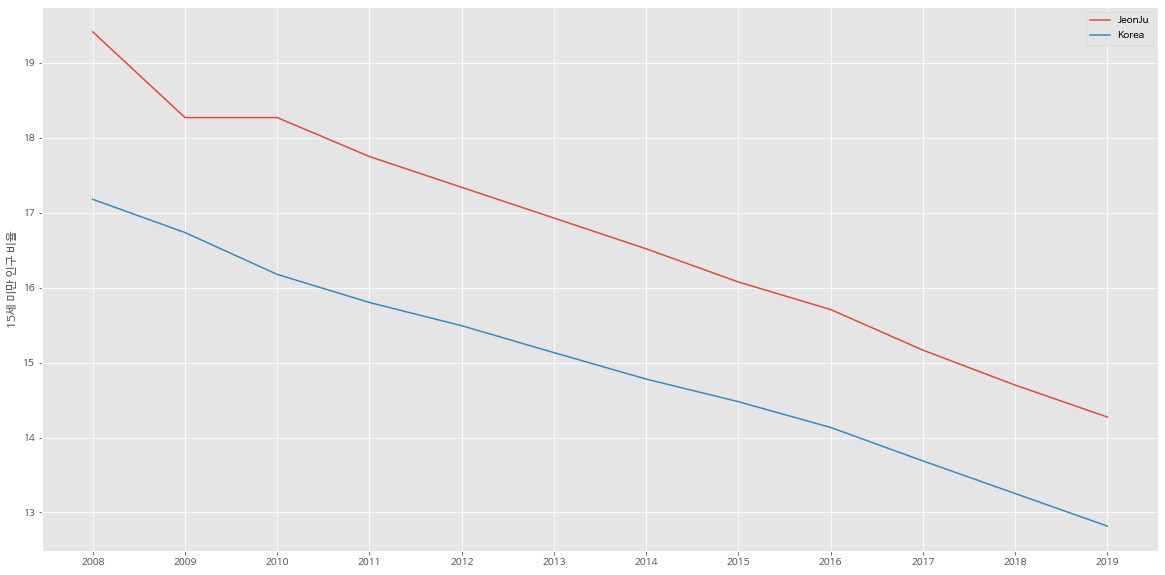

In [ ]:
plt.figure(figsize=(20,10))

plt.plot((j_pop2['child']/j_pop2['합계'])*100)
plt.plot((k_pop['child']/k_pop['합계'])*100)
plt.legend(["JeonJu","Korea"])
plt.xticks(np.arange(0, 12),labels=['2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019'])
plt.ylabel("15세 미만 인구 비율")
plt.show()

Text(0.5, 1.0, '65세 이상 인구 비율')

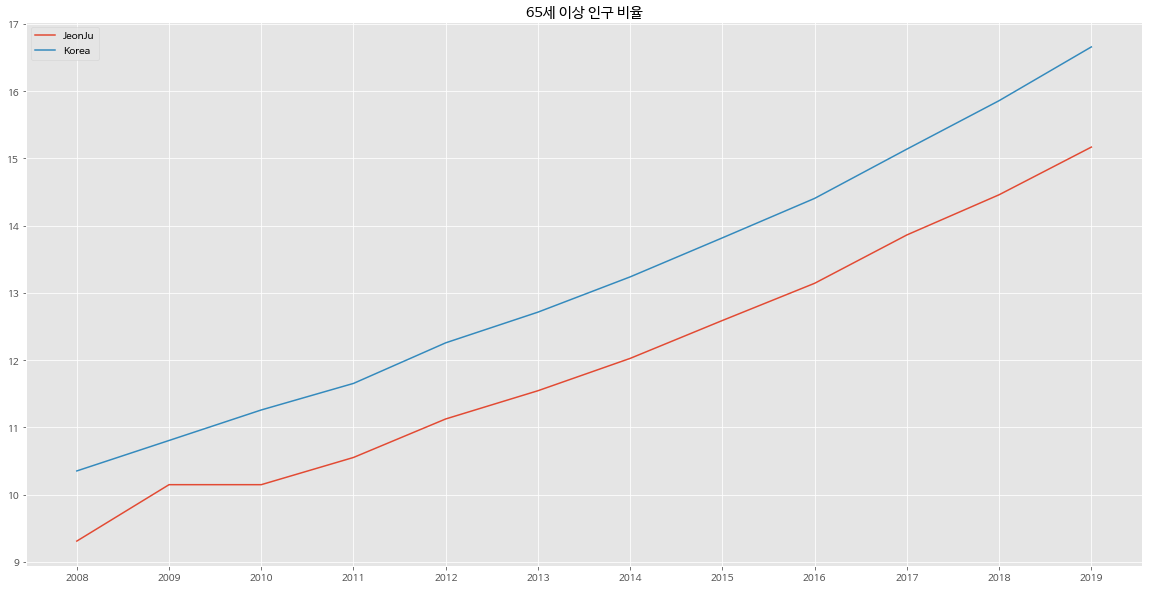

In [ ]:
plt.figure(figsize=(20,10))

plt.plot((j_pop2['old']/j_pop2['합계'])*100)
plt.plot((k_pop['old']/k_pop['합계'])*100)
plt.legend(["JeonJu","Korea"])
plt.xticks(np.arange(0, 12),labels=['2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019'])
plt.title("65세 이상 인구 비율")


전주시의 전입/전출자수 분석

In [ ]:
move = pd.read_excel('/content/drive/MyDrive/Jeonju/data/시·군·구별_연령_각세_별_한국인_현황.xlsx',sheet_name='전입전출',thousands=",")
move

,연도,전입자수,전출자수
0,2008,53885,49868
1,2009,49260,48777
2,2010,47597,47493
3,2011,47987,46657
4,2012,40671,42577
5,2013,39789,41169
6,2014,34246,36059
7,2015,41074,44185
8,2016,43447,42475
9,2017,37633,41515


In [ ]:
move.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   연도      12 non-null     int64
 1   전입자수    12 non-null     int64
 2   전출자수    12 non-null     int64
dtypes: int64(3)
memory usage: 416.0 bytes


In [ ]:
countyby = pd.read_excel('/content/drive/MyDrive/Jeonju/data/시·군·구별_연령_각세_별_한국인_현황.xlsx',sheet_name='구별_65세이상',thousands=",")
countyby = pd.melt(countyby,id_vars=['연도'],var_name='구',value_name='노인인구수')
countyby

,연도,구,노인인구수
0,2008,완산구,31921
1,2009,완산구,34193
2,2010,완산구,34193
3,2011,완산구,35946
4,2012,완산구,38100
5,2013,완산구,39875
6,2014,완산구,41803
7,2015,완산구,43957
8,2016,완산구,45324
9,2017,완산구,47420


전주시의 전입,전출자수 비교 결과 

아동과 노인인구 감소비율 비교
비교를 위해서 생산가능인구 대비로 표현해도 좋을 듯  
이후 아동(가족,다자녀), 노인 복지 제도개수와 비교하거나  
어린이집 / 노인병원 / 양로원개수 등과 비교해서  
군산이나 익산 등 다른 인근 전북의 도시와 비교   
취업자수  
전주시 인구증가율 대비 노인인구 증가율


* 노인 인구 대비 노인 여가시설관련 분석

In [ ]:
forsenior = pd.read_excel('/content/drive/MyDrive/Jeonju/data/시·군·구별_연령_각세_별_한국인_현황.xlsx',sheet_name='노인여가',thousands=",")
forsenior

,연도,합계,노인복지관 시설수,노인복지관 종사자수,노인복지관 남자종사자수,노인복지관여자종사자수,경로당,노인교실
0,2008,587,6,-,-,-,562,19
1,2009,589,5,-,-,-,564,20
2,2010,594,6,-,-,-,569,19
3,2011,603,6,-,-,-,591,6
4,2012,608,6,74,29,45,596,6
5,2013,587,6,77,28,48,575,6
6,2014,599,7,102,42,60,586,6
7,2015,606,7,68,27,41,591,8
8,2016,612,10,90,35,55,594,8
9,2017,613,7,142,85,57,598,8




---



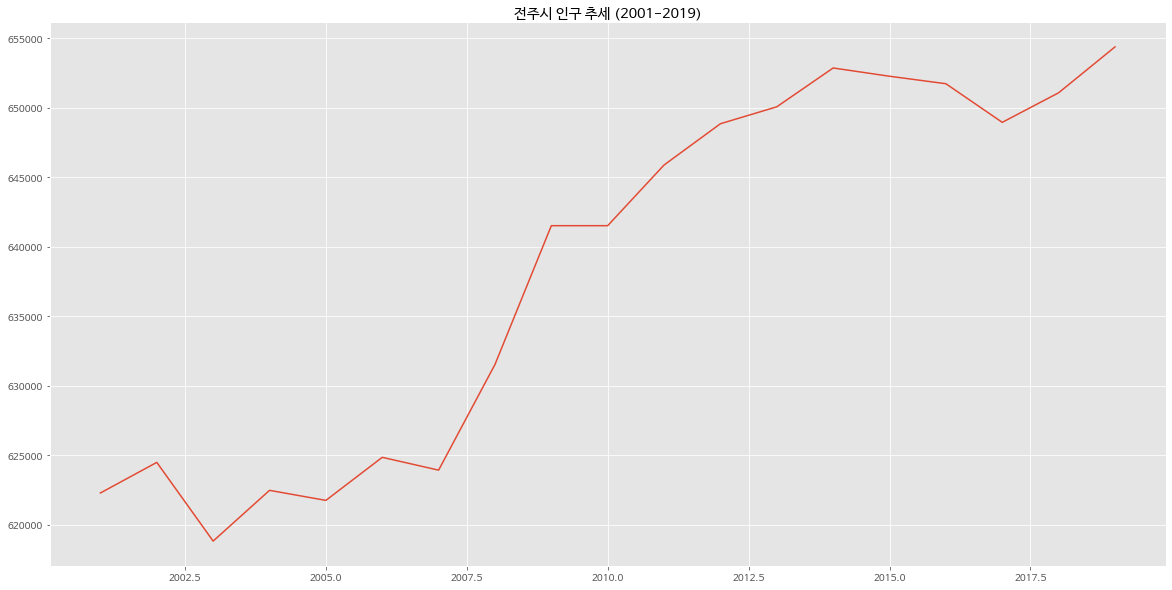

In [ ]:
plt.figure(figsize=(20,10))

plt.plot(j_pop['year'],j_pop["합계"])
plt.title("전주시 인구 추세 (2001-2019)")
plt.show()

공공기관의 지방이전으로 2017년 이후에는 인구 증가에 대한 추세가 바뀌는 것을 볼 수 있음.

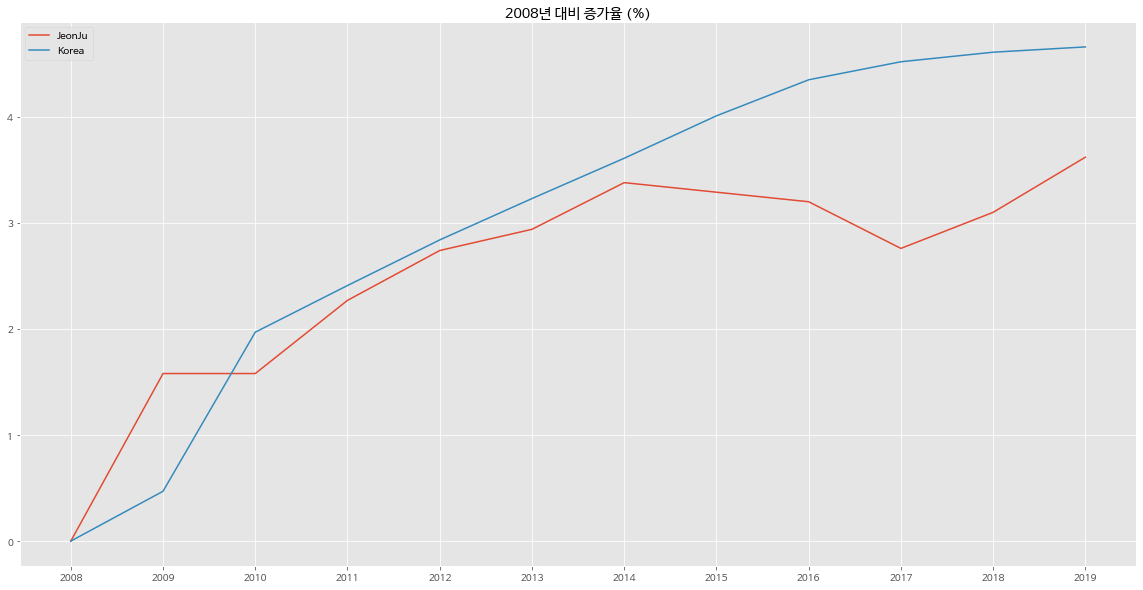

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(jeonju)
plt.plot(korea)
plt.legend(['JeonJu','Korea'])
plt.title("2008년 대비 증가율 (%)")
plt.xticks(np.arange(0, 12),labels=['2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019'])
plt.show()

In [ ]:
year = j_pop2['year']
year

0     2008
1     2009
2     2010
3     2011
4     2012
5     2013
6     2014
7     2015
8     2016
9     2017
10    2018
11    2019
Name: year, dtype: int64

하지만 전국과 비교해 보면 전주의 인구 증가 속도는 전국평균치보다 낮은 것으로 판단할 수 있다. 

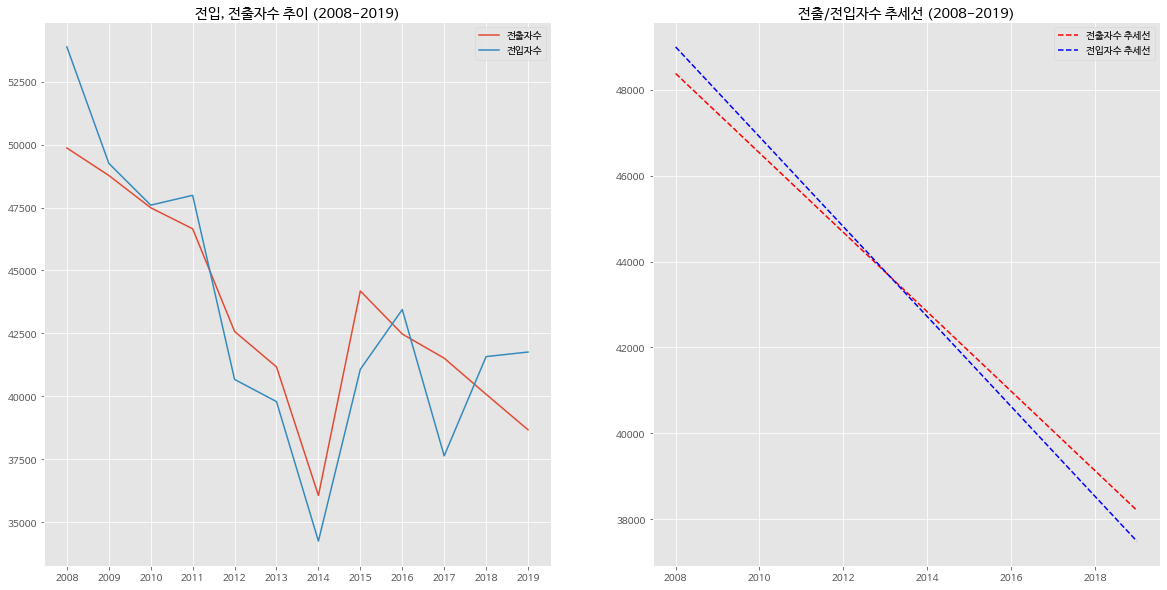

In [ ]:
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.plot(move['전출자수'])
plt.plot(move['전입자수'])
plt.legend(['전출자수',"전입자수"])
plt.xticks(np.arange(0, 12),labels=['2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019'])
plt.title("전입, 전출자수 추이 (2008-2019)")

plt.subplot(1,2,2)
x =  move['연도']
y = move['전출자수']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

x =  move['연도']
y = move['전입자수']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"b--")
plt.legend(["전출자수 추세선","전입자수 추세선"])
plt.title("전출/전입자수 추세선 (2008-2019)")

plt.show()

전입-전출자 수 추이를 살펴보면,  
큰 차이는 나고 있지 않으나 전입자수가 전출자수 보다 많던 2008년과는 달리 
2019년 전출자수가 전입자수보다 많은 것을 볼 수 있음.


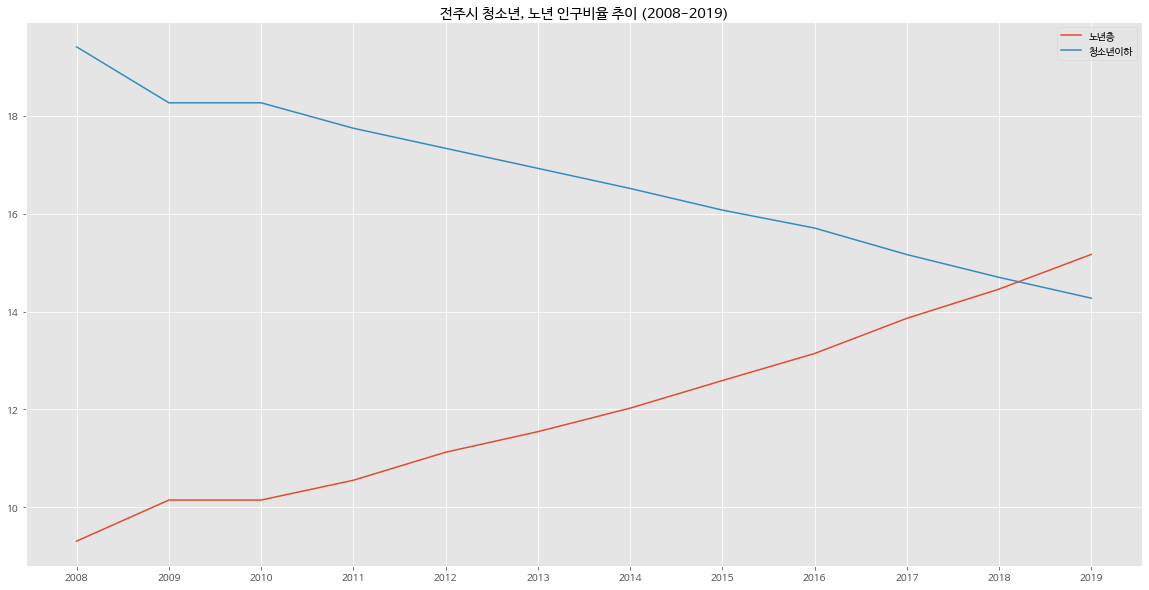

In [ ]:
plt.figure(figsize=(20,10))

plt.plot((j_pop2['old']/j_pop2['합계'])*100)
plt.plot((j_pop2['child']/j_pop2['합계'])*100)
plt.legend(["노년층","청소년이하"])
plt.xticks(np.arange(0, 12),labels=['2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019'])
plt.title("전주시 청소년, 노년 인구비율 추이 (2008-2019)")

plt.show()

2018년 이후 전체 전주시 인구구성에서 노년층 비율이 청소년 이하 비율을 앞지른 것으로 나타났다. 

* 노인인구당 복지관 수 

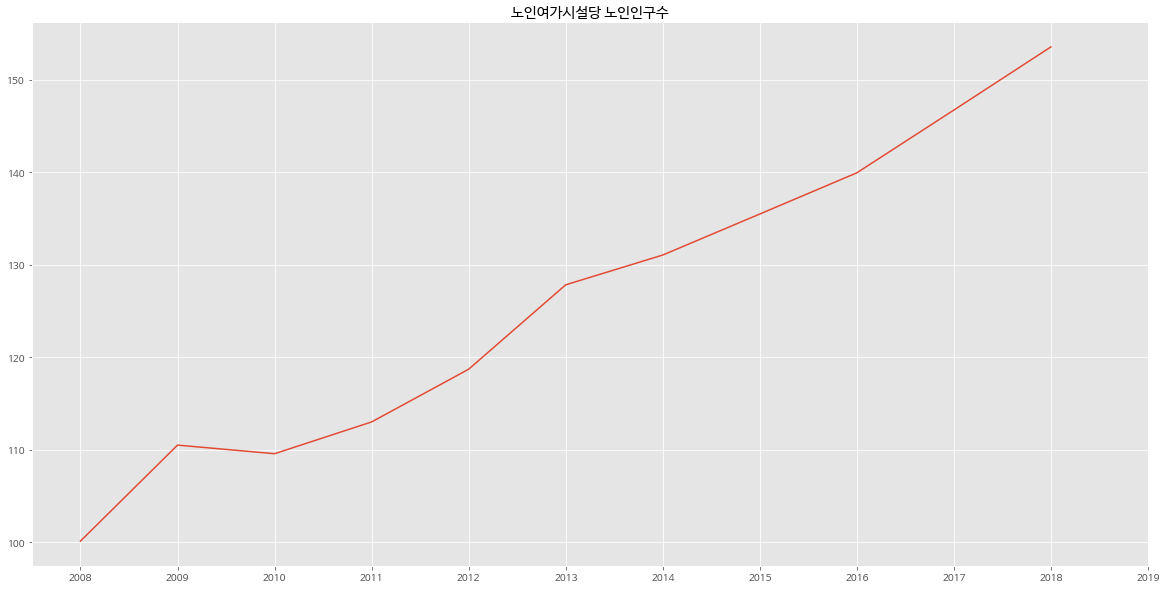

In [ ]:
plt.figure(figsize=(20,10))

plt.plot(j_pop2['old']/forsenior["합계"])
plt.xticks(np.arange(0, 12),labels=['2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019'])
plt.title("노인여가시설당 노인인구수")

plt.show()

In [ ]:
forsenior[['연도','노인복지관 시설수','경로당','노인교실','합계']]

,연도,노인복지관 시설수,경로당,노인교실,합계
0,2008,6,562,19,587
1,2009,5,564,20,589
2,2010,6,569,19,594
3,2011,6,591,6,603
4,2012,6,596,6,608
5,2013,6,575,6,587
6,2014,7,586,6,599
7,2015,7,591,8,606
8,2016,10,594,8,612
9,2017,7,598,8,613


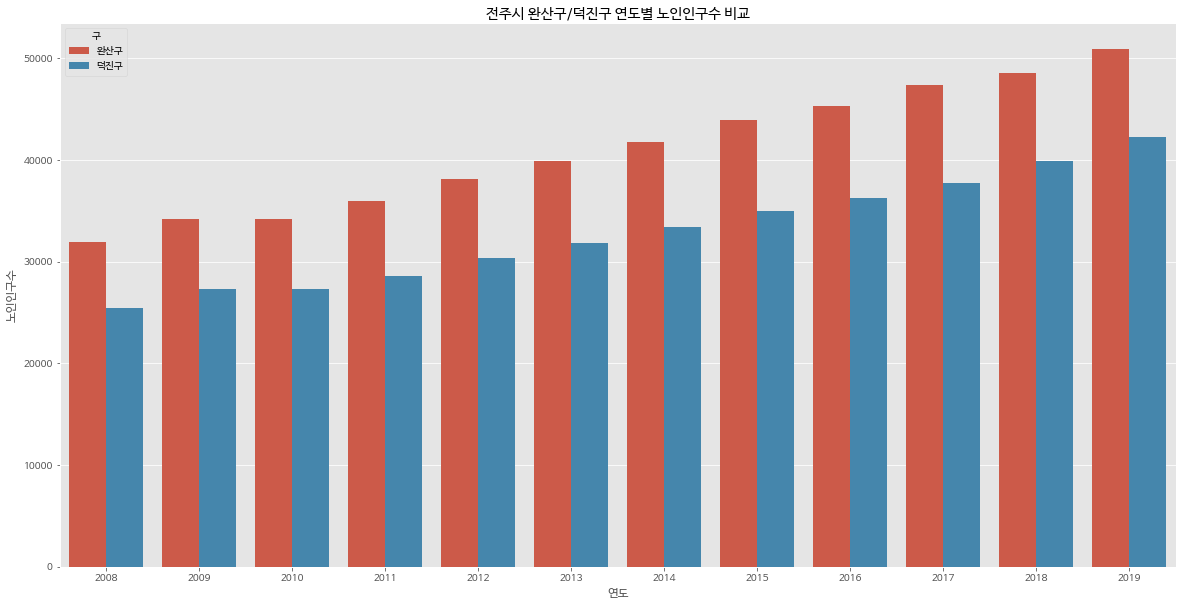

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(data = countyby,x='연도',y='노인인구수',hue='구')
plt.title("전주시 완산구/덕진구 연도별 노인인구수 비교")
plt.show()